Project Description: This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

The dataset is extracted fro kaggle.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


We are going to predict whether a person's income is above 50k or below 50k using various features like age, education,sex, income  and occupation.

The problem is supervised classifcation one 


Steps to Follow for the Project: The dataset contains 14 features and 32561 samples
Below are the steps to follow for the project:

Import the required libraries and data.
Do the careful EDA analysis, preprocessing and feature engineering on the given data.
Build/Test multiple models on the same dataset.
Check underfitting/overfitting,  avoid underfitting or overfitting (bias/variance) , cross validation and all performance parameters(metrics) for all models depending on the problem type.
Try to achieve a model with good performance.
Select the best/final performing model and explain on what basis you have selected the particular model as a final model.
Do hyper parameter tuning on the final/best model or on all models.
Save the best model for production and convey on which basis you have chosen that model.
Make the documentation and write your findings in the same file i.e. ipynb

# Importing required Libraries

In [413]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import datasets,linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import warnings 
warnings.filterwarnings('ignore')
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
import joblib
from sklearn.model_selection import cross_validate,KFold,cross_val_score
from sklearn.metrics import  roc_curve, roc_auc_score
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier)
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor


In [414]:
# Loading the dataset downloaded from kaggle
census_dt=pd.read_csv('census_data.csv')
census_dt.tail(10)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
32551,32,Private,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [415]:
census_dt.shape # to determine the shape of the dataset

(32561, 14)

In [416]:
census_dt.info() # to determine the data types of the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education_num   32561 non-null  int64 
 4   marital_status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   gender          32561 non-null  object
 9   capital_gain    32561 non-null  int64 
 10  capital_loss    32561 non-null  int64 
 11  hours_per_week  32561 non-null  int64 
 12  native_country  32561 non-null  object
 13  income_bracket  32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [417]:
# groupby column data types
census_dt.columns.groupby(census_dt.dtypes)

{int64: ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week'], object: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'native_country', 'income_bracket']}

In [418]:
# There are 32561 rows , 14 Independent columns and 1 Target feature.
# Age,Fnlwgt, education_num, capital gain, capital loss, hours per week are Numerical variable and having int64 datatypes.
# Work class, Education,Marital status, occupation, relationship, race,sex,native country are categorical feature with object datatypes.

In [419]:
# number of columns of a particular data type
print("No of columns for {} is {}.".format(list(census_dt.columns.groupby(census_dt.dtypes).keys())[0], len(census_dt.columns.groupby(census_dt.dtypes)[list(census_dt.columns.groupby(census_dt.dtypes).keys())[0]])))
print("No of columns for {} is {}.".format(list(census_dt.columns.groupby(census_dt.dtypes).keys())[1], len(census_dt.columns.groupby(census_dt.dtypes)[list(census_dt.columns.groupby(census_dt.dtypes).keys())[1]])))

No of columns for int64 is 5.
No of columns for object is 9.


In [420]:
# Separating numerical and categorical variable
Num_var=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
Cate_var=['workclass','education','marital_status','occupation','relationship','race','gender','native_country','income_bracket']

In [422]:
census_dt['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

# Data Cleaning and Transfroming (Exploratory Data Analysis)

In [423]:
# Checking for null values
census_dt.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_bracket    0
dtype: int64

In [424]:
# Checking for duplicated values since the dataset is large
census_dt.duplicated().sum()


3465

In [425]:
# droping the duplicated values
census_dt.drop_duplicates(keep='last',inplace=True)

In [426]:
census_dt.shape # 3465 duplicates value was removed

(29096, 14)

In [427]:
# Checking presnce of ? in dataset
census_dt.isin([' ?']).sum()

age                  0
workclass         1632
education            0
education_num        0
marital_status       0
occupation        1639
relationship         0
race                 0
gender               0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     580
income_bracket       0
dtype: int64

In [428]:
# replacing ? with NAN
census_dt=census_dt.replace(' ?',np.NAN)

<AxesSubplot:>

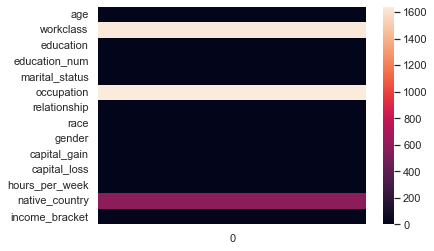

In [429]:
# Using Heat map to check for null values
sns.heatmap(census_dt.isnull().sum().to_frame())

In [430]:
# Checking for null values
census_dt.isnull().sum()

age                  0
workclass         1632
education            0
education_num        0
marital_status       0
occupation        1639
relationship         0
race                 0
gender               0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     580
income_bracket       0
dtype: int64

In [431]:
# There are missing values in Workclass, occupation  and native_country

In [432]:
# Imputating Missing value with mode for categorical features because they are categorical features
census_dt['workclass'].fillna(census_dt['workclass'].mode()[0],inplace=True)
census_dt['occupation'].fillna(census_dt['occupation'].mode()[0],inplace=True)
census_dt['native_country'].fillna(census_dt['native_country'].mode()[0], inplace=True)

In [433]:
# Checking for null values
census_dt.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_bracket    0
dtype: int64

# Univarite Analysis

In [434]:
census_dt.head(10)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [435]:
# Converting Categorical value to Numerical
census_dt['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [436]:
new_census_dt=census_dt.copy()

In [437]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Cate_var:
    new_census_dt[i] = le.fit_transform(new_census_dt[i])
new_census_dt.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,6,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,9,13,2,9,5,2,0,0,0,40,4,0


In [438]:
 new_census_dt.describe()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
count,29096.000000,29096.000000,29096.000000,29096.000000,29096.000000,29096.000000,29096.000000,29096.000000,29096.000000,29096.000000,29096.000000,29096.000000,29096.000000,29096.000000
mean,39.251340,3.102557,10.208826,10.102695,2.592418,6.225392,1.471336,3.632080,0.661465,1197.802206,97.175179,40.637820,36.235531,0.247800
std,13.687157,1.158217,3.912197,2.645194,1.536713,3.966122,1.623552,0.885281,0.473219,7778.225220,424.008232,12.735418,6.373242,0.431743
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,38.000000,3.000000,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


In [439]:
census_dt.head(10)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# Univarite Analysis

In [440]:
# Determine the unique values for each region
income_status = census_dt["income_bracket"].value_counts()
income_status

 <=50K    21886
 >50K      7210
Name: income_bracket, dtype: int64

                           Target Variable Distribution                          


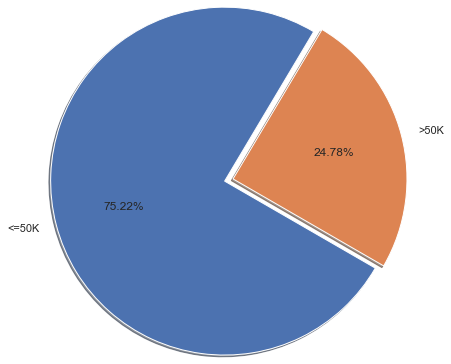

In [441]:
labels = ['<=50K','>50K']
explode=np.zeros(len(labels))
explode[-1]=0.1
# Representing the pie chart using Pie Chart
print('\033[1mTarget Variable Distribution'.center(85))
plt.pie(census_dt["income_bracket"].value_counts(), labels=labels, counterclock=False, shadow=True,explode=explode, autopct='%1.2f%%', radius=2, startangle=-30)
plt.show()

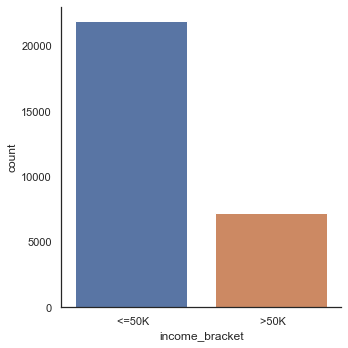

In [442]:
#Analysis of Income Status
sns.set(style="white")
sns.catplot(x = 'income_bracket', data =census_dt , kind = 'count',margin_titles =False,label=labels)

# 75.22 % population have income less than 50K and 24.78% have income greater than 50 %, we can see that target variable income is imbalanced

                                  Marital Status                                 


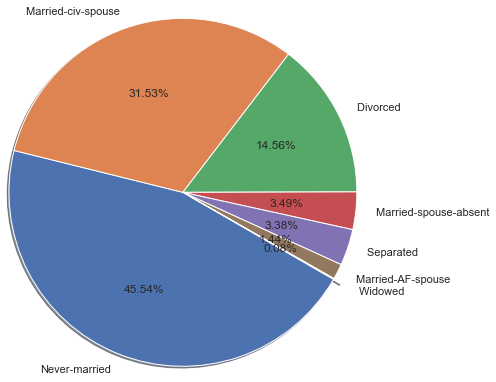

In [443]:
labels =['Never-married', ' Married-civ-spouse', ' Divorced',' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed']
explode=np.zeros(len(labels))
explode[-1]=0.1
# Representing the pie chart using Pie Chart
print('\033[1m Marital Status'.center(85))
plt.pie(census_dt["marital_status"].value_counts(), labels=labels, counterclock=False, shadow=True,explode=explode, autopct='%1.2f%%', radius=2, startangle=-30)
plt.show()

Text(0, 0.5, 'Education')

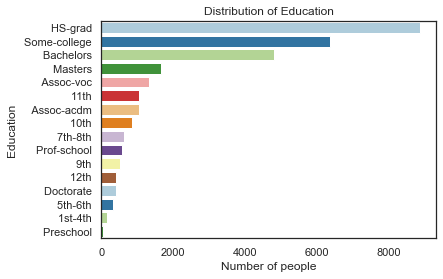

In [444]:
#Analysis of Education
educ=census_dt['education'].value_counts()
sns.set(style="white")
sns.barplot(x =educ.values,y=educ.index,palette='Paired')
plt.title('Distribution of Education')
plt.xlabel('Number of people')
plt.ylabel('Education')

Text(0, 0.5, 'occupation')

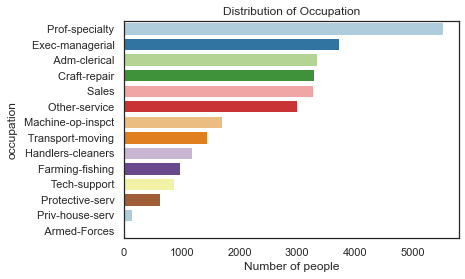

In [445]:
#Analysis of Occupation
ocup=census_dt['occupation'].value_counts()
sns.set(style="white")
sns.barplot(x =ocup.values,y=ocup.index,palette='Paired')
plt.title('Distribution of Occupation')
plt.xlabel('Number of people')
plt.ylabel('occupation')

Text(0, 0.5, 'Education years')

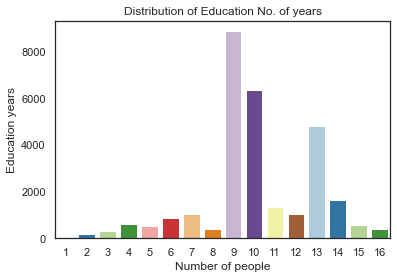

In [446]:
#Analysis of Years of Education
educ_y=census_dt['education_num'].value_counts()
sns.set(style="white")
sns.barplot(y =educ_y.values,x=educ_y.index,palette='Paired')
plt.title('Distribution of Education No. of years')
plt.xlabel('Number of people')
plt.ylabel('Education years')

                               Relationship Status                               


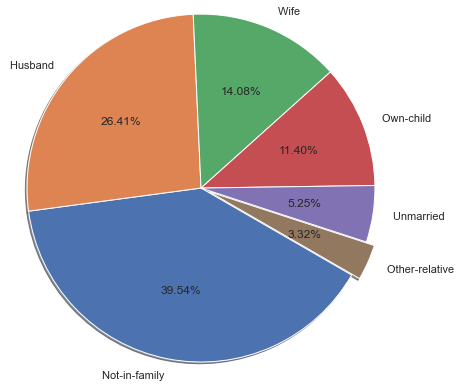

In [447]:
labels =[' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',' Other-relative']
explode=np.zeros(len(labels))
explode[-1]=0.1
# Representing the pie chart using Pie Chart
print('\033[1mRelationship Status'.center(85))
plt.pie(census_dt["relationship"].value_counts(), labels=labels, counterclock=False, shadow=True,explode=explode, autopct='%1.2f%%', radius=2, startangle=-30)
plt.show()

                                   Race Status                                   


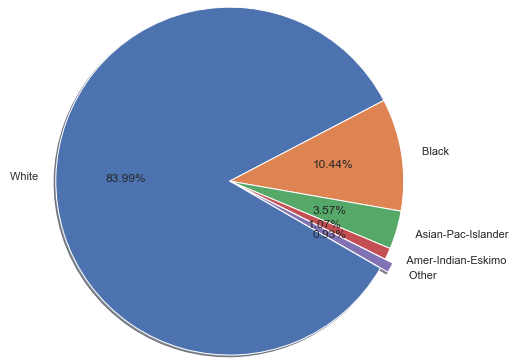

In [448]:
labels =[' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',' Other']
explode=np.zeros(len(labels))
explode[-1]=0.1
# Representing the pie chart using Pie Chart
print('\033[1mRace Status'.center(85))
plt.pie(census_dt["race"].value_counts(), labels=labels, counterclock=False, shadow=True,explode=explode, autopct='%1.2f%%', radius=2, startangle=-30)
plt.show()

                                Gender Distribution                              


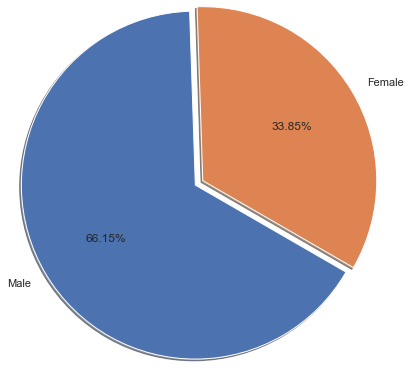

In [449]:
labels = ['Male','Female']
explode=np.zeros(len(labels))
explode[-1]=0.1
# Representing the pie chart using Pie Chart
print('\033[1m Gender Distribution'.center(85))
plt.pie(census_dt["gender"].value_counts(), labels=labels, counterclock=False, shadow=True,explode=explode, autopct='%1.2f%%', radius=2, startangle=-30)
plt.show()

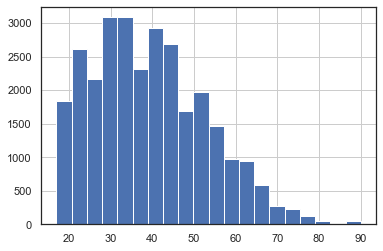

In [450]:
# Diffirent age categories for the titanic passengers
hisr = census_dt['age'].hist(bins=20)

# Bivarite Analysis

In [451]:
# function to Visualizing Categorical values using Box plot
def features_plot(Categorical_column):
    plt.figure(figsize=(15,10))
    plt.subplot(2,1,1)
    col_name=['education_num','workclass','education','marital_status','occupation','relationship','race','gender']
    sns.countplot(x=Categorical_column,hue='income_bracket', data=census_dt)
    plt.title(f"{Categorical_column.title()} vs income_bracket",fontweight="black",size=25,pad=10,)
    plt.legend(title='subscribed', loc='upper right', labels=['<=50K','>50K'])
    col_values = census_dt[Categorical_column].value_counts()
    plt.tight_layout()

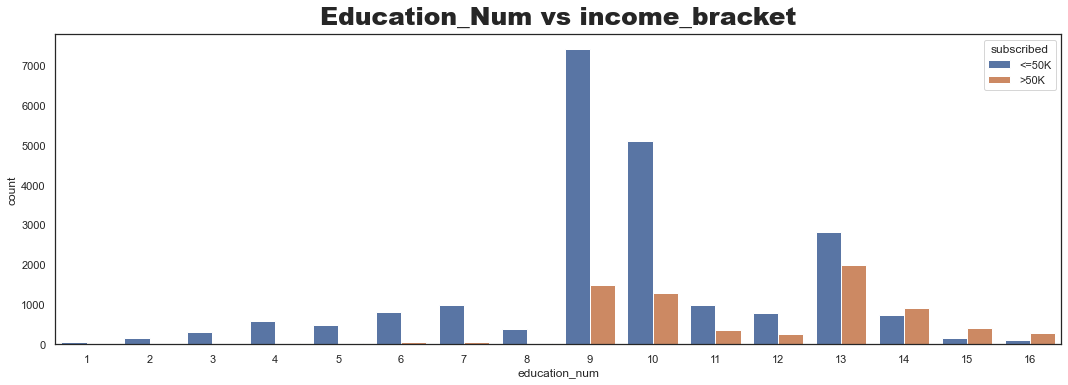

In [452]:
features_plot('education_num')


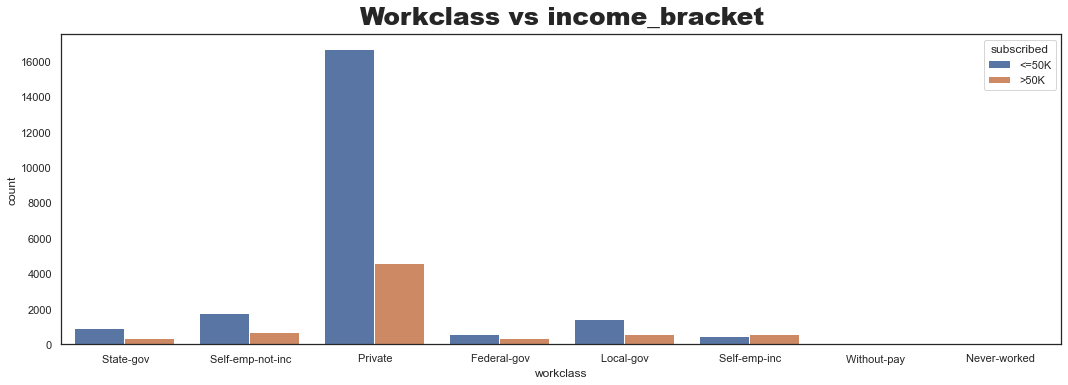

In [453]:
features_plot('workclass')

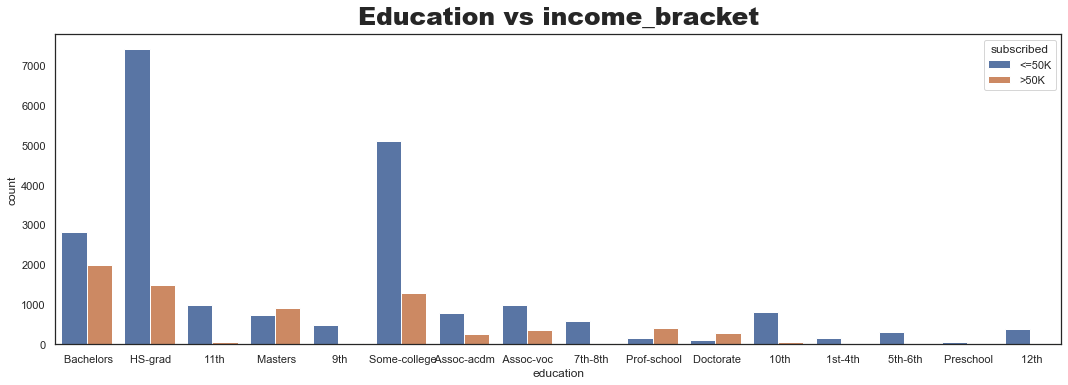

In [454]:
features_plot('education')

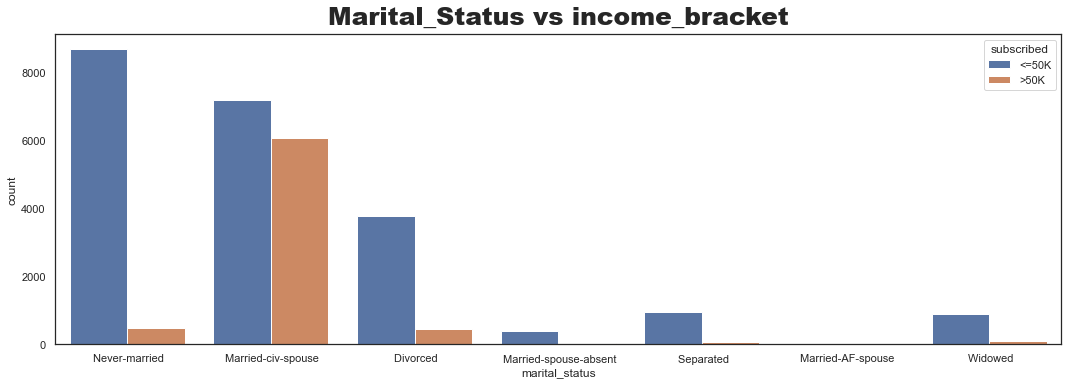

In [455]:
features_plot('marital_status')

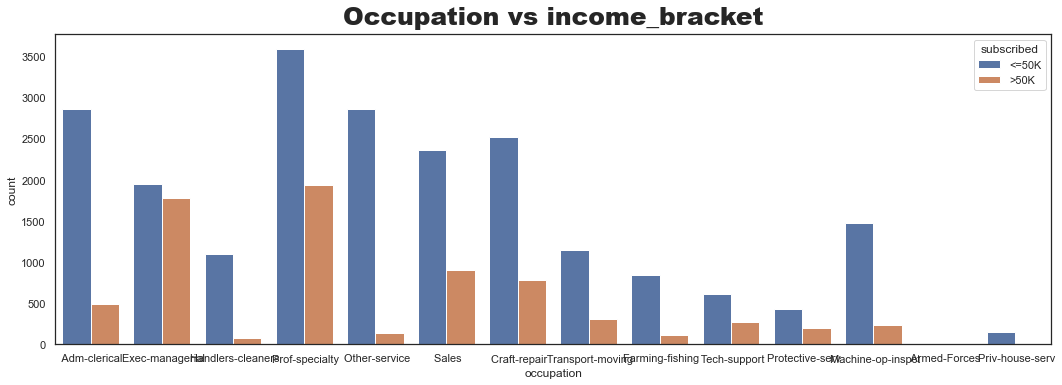

In [456]:
features_plot('occupation')

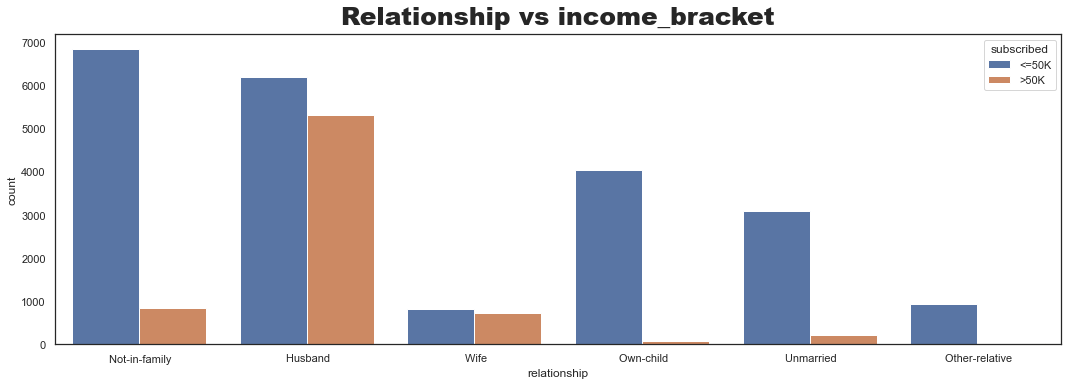

In [457]:
features_plot('relationship')

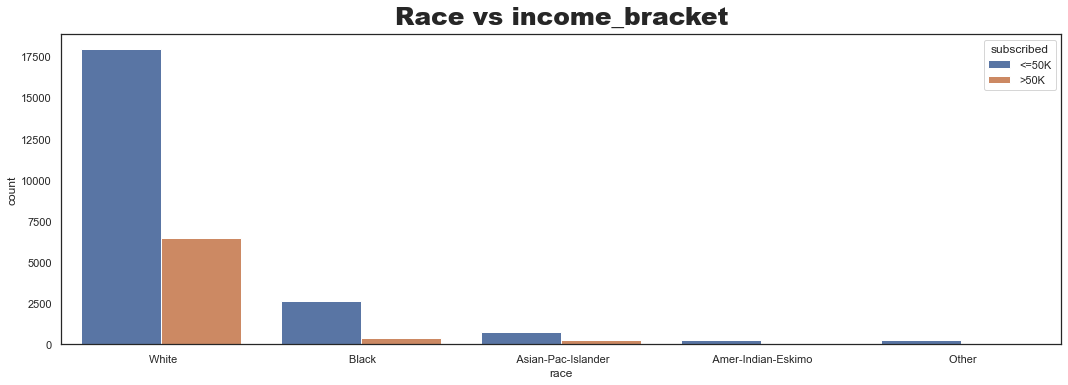

In [458]:
features_plot('race')

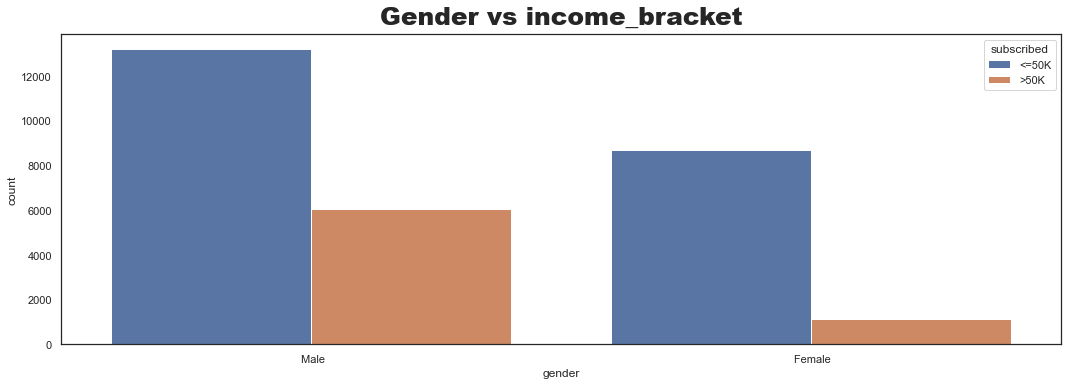

In [459]:
features_plot('gender')

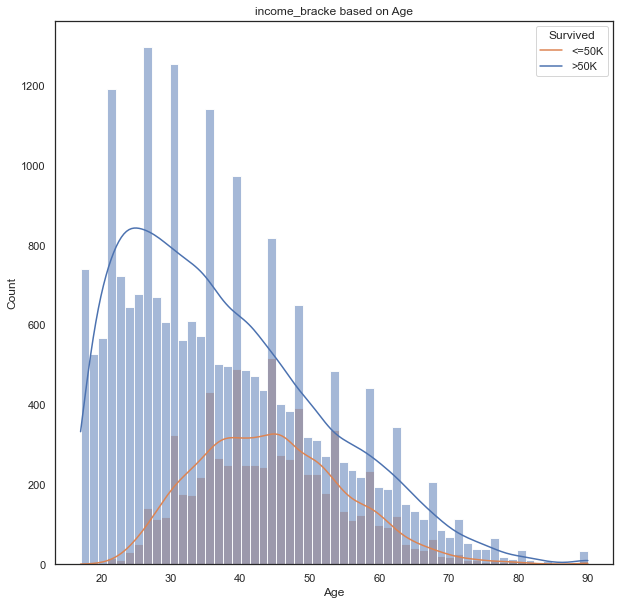

In [460]:
# Visualizing survival based on socio-economic status (age)
plt.figure(figsize=(10, 10))
sns.histplot(x='age', hue='income_bracket', data=census_dt, kde=True)
plt.title('income_bracke based on Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['<=50K','>50K'])
plt.show()

# Multivarite Analysis

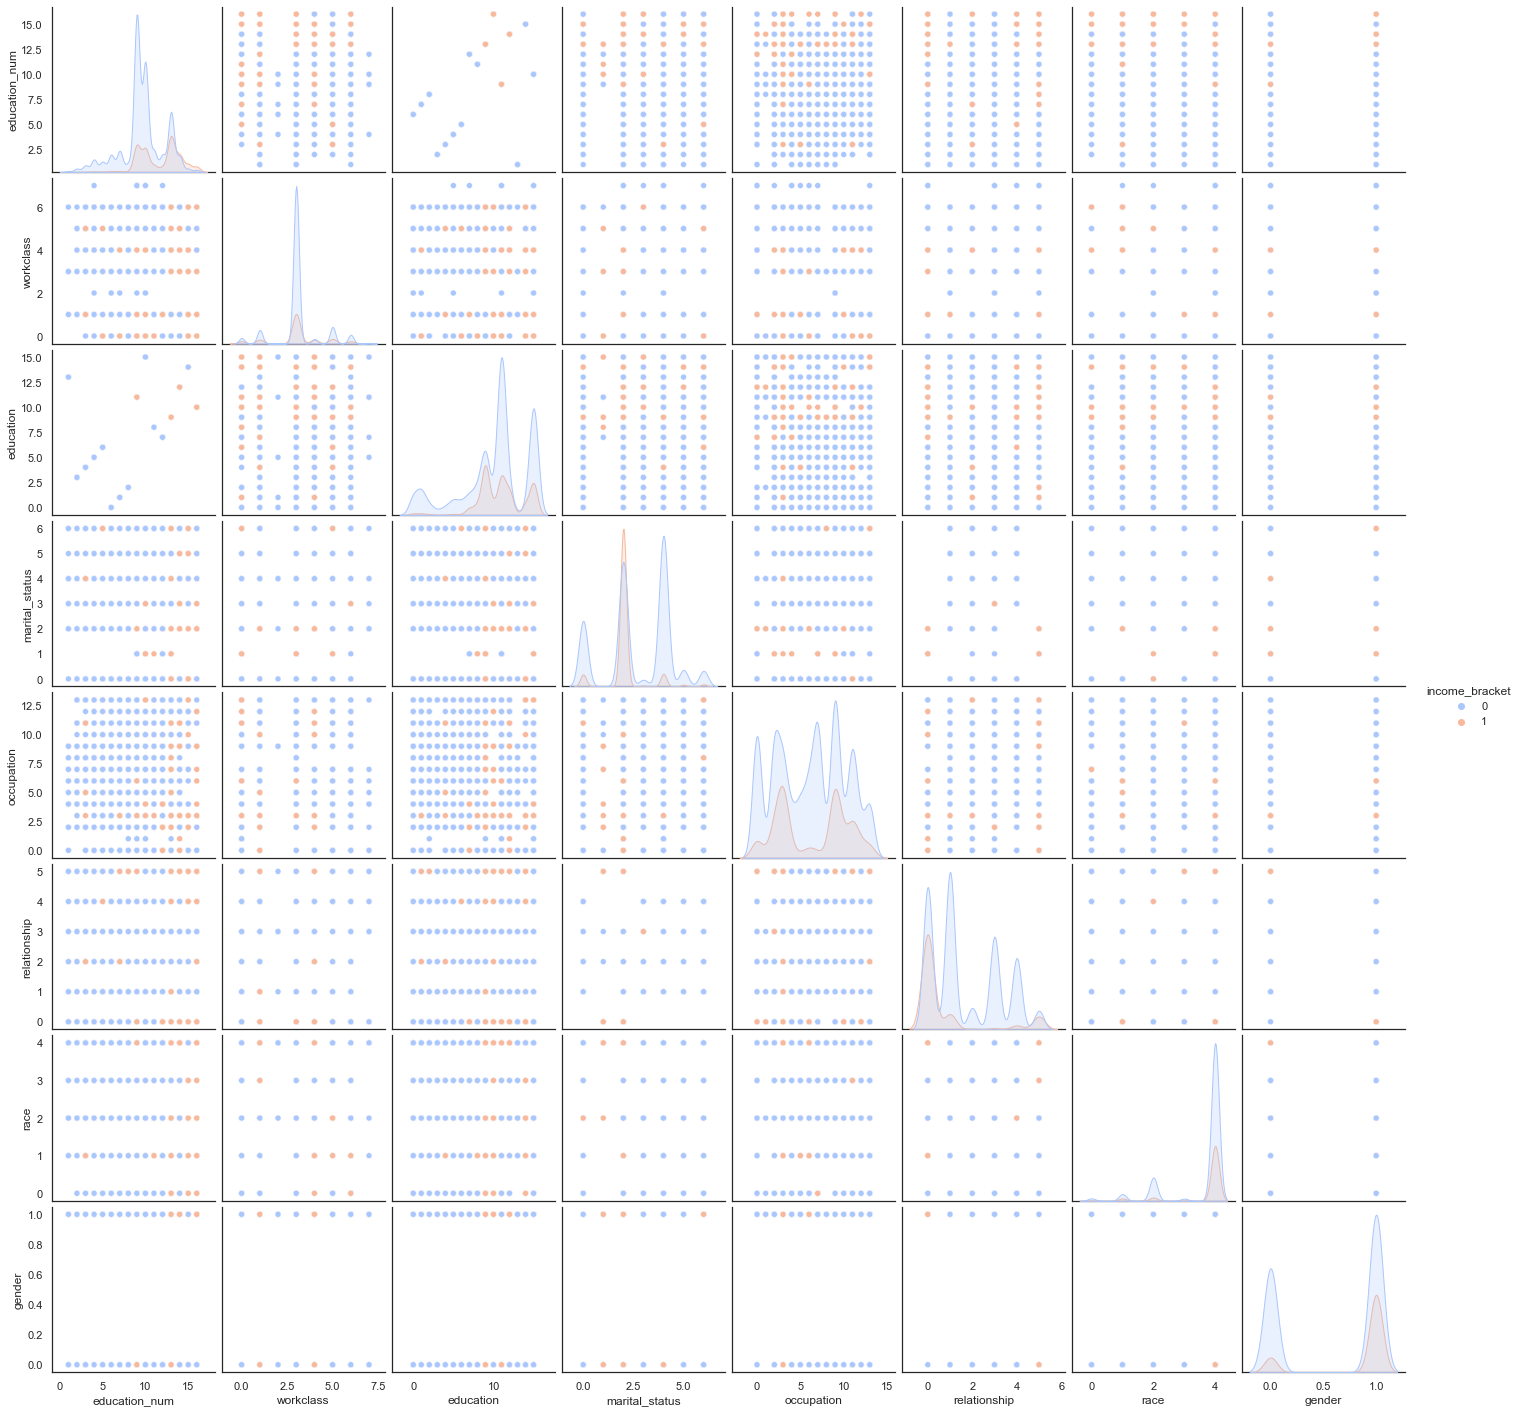

In [461]:
#Pairplot of all numerical variables
sns.pairplot(new_census_dt,vars=['education_num','workclass','education','marital_status','occupation','relationship','race','gender'],hue='income_bracket',palette="coolwarm")
plt.show()

# Feature Selection/Extraction- to identify the most relevant features

<AxesSubplot:>

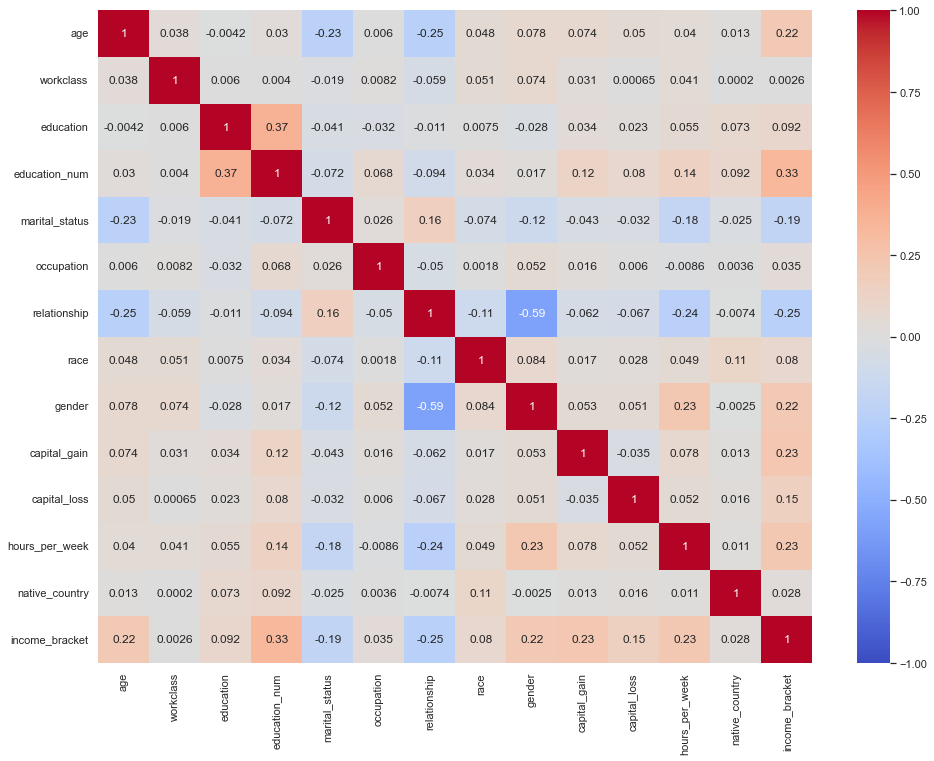

In [462]:
# Having a look at the correlation matrix
plt.figure(figsize=(16,12))
mask = np.zeros_like(new_census_dt.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=new_census_dt.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

From the correlation heatmap, we can see that the dependent feature 'income_bracket' is highly correlated with age, educstion_num, marital_status,relationship and number of hours per week.

In [463]:
# Checking for Outliers
# Checking for skewness of the data to determine outliers
new_census_dt.skew()

age                0.540444
workclass          0.048808
education         -0.891985
education_num     -0.351246
marital_status     0.018459
occupation        -0.036280
relationship       0.787824
race              -2.273329
gender            -0.682460
capital_gain      11.332823
capital_loss       4.321745
hours_per_week     0.239739
native_country    -3.984088
income_bracket     1.168367
dtype: float64

In [464]:
from sklearn.preprocessing import power_transform # using power Transformation method to remove outliers from Capital_gain and Capital loss
new_census_dt[['capital_gain','capital_loss']]=power_transform(new_census_dt[['capital_gain','capital_loss']],method='yeo-johnson')

In [465]:
# Checking for skewness of the data after transformatio
new_census_dt.skew()

age               0.540444
workclass         0.048808
education        -0.891985
education_num    -0.351246
marital_status    0.018459
occupation       -0.036280
relationship      0.787824
race             -2.273329
gender           -0.682460
capital_gain      2.808434
capital_loss      4.038883
hours_per_week    0.239739
native_country   -3.984088
income_bracket    1.168367
dtype: float64

In [466]:
from scipy.stats import zscore
zee = np.abs(zscore(new_census_dt))
threshold = 3
new_census_dt1 = new_census_dt[(zee<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", new_census_dt.shape)
print ("Shape of the dataframe after removing outliers: ", new_census_dt1.shape)
print ("Percentage of data loss post outlier removal: ", (new_census_dt.shape[0]-new_census_dt1.shape[0])/new_census_dt.shape[0]*100)

new_census_dt=new_census_dt1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (29096, 14)
Shape of the dataframe after removing outliers:  (23160, 14)
Percentage of data loss post outlier removal:  20.401429749793788


# Data Preprocessing for Classification problem

In [470]:
# Separating feature data and Label data
X = new_census_dt.drop(['income_bracket'],axis=1)
y= new_census_dt['income_bracket']

In [471]:
# Standardizing the dataset for X
from sklearn.preprocessing import StandardScaler
stdscalar= StandardScaler()
X_Scalar= stdscalar.fit_transform(X)

In [472]:
X_train, X_test, y_train, y_test = train_test_split(X_Scalar, y, test_size = 0.25,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((17370, 13), (5790, 13), (17370,), (5790,))

# Build/Test multiple models

In [474]:
#Using Logistic Regression to  train a logistic regression model on the training set
lreg = LogisticRegression()
lreg.fit(X_train, y_train)
# Predicting the data model
lreg_pred = lreg.predict(X_test) # Predicting the model
lreg_pred.shape

(5790,)

In [476]:
#Accuracy and various Metrics for the model
LR_testing=round(lreg.score(X_train, y_train)*100,2)
LR_mae=mean_absolute_error(lreg_pred,y_test)
LR_mse=mean_squared_error(lreg_pred,y_test)
LR_rmse=np.sqrt(mean_squared_error(lreg_pred,y_test))
LR_r2=r2_score(y_test,lreg_pred)*100
print('Mean absolute error  =>',LR_mae)
print('Mean squared error  =>',LR_mse)
print('Root Mean squared error  =>',LR_rmse)
print('R2 Score  =>',LR_r2)
print("Accuracy Score of Testing Data is =>",LR_testing)

Mean absolute error  => 0.17063903281519863
Mean squared error  => 0.17063903281519863
Root Mean squared error  => 0.41308477678946076
R2 Score  => -7.558392599451902
Accuracy Score of Testing Data is => 82.3


In [477]:
# Create instances of all other classifier- Using other models
rfc=RandomForestClassifier()
et =ExtraTreesClassifier() 
bmc = BaggingClassifier() 
abc = AdaBoostClassifier()
gbc=GradientBoostingClassifier()
rft=RandomForestClassifier()
knn= KNeighborsClassifier()
svc=SVC(random_state=42)
dt=DecisionTreeClassifier(random_state=42)



 Error of  RandomForestClassifier() :
Mean absolute error : 0.1772020725388601
Mean squared error : 0.1772020725388601
Root Mean Squared Error: 0.4209537653221077


 R2 Score : -0.11695253853276988
82.27979274611398




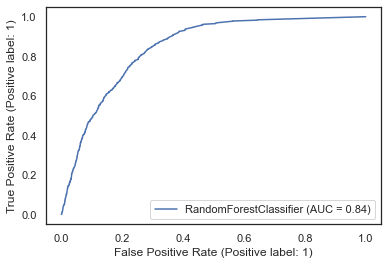



 Error of  ExtraTreesClassifier() :
Mean absolute error : 0.18393782383419688
Mean squared error : 0.18393782383419688
Root Mean Squared Error: 0.4288797312000147


 R2 Score : -0.15940979876939565
81.60621761658031




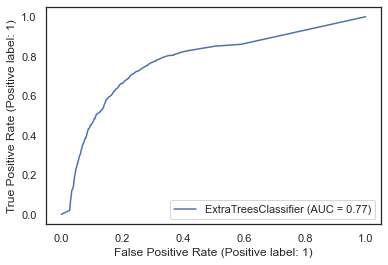



 Error of  BaggingClassifier() :
Mean absolute error : 0.19050086355785836
Mean squared error : 0.19050086355785836
Root Mean Squared Error: 0.4364640461227687


 R2 Score : -0.2007784113076463
80.94991364421416




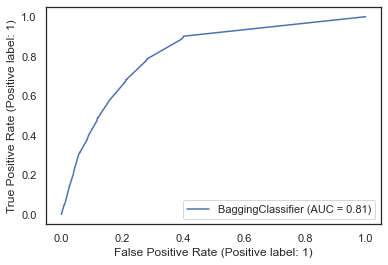



 Error of  AdaBoostClassifier() :
Mean absolute error : 0.14680483592400692
Mean squared error : 0.14680483592400692
Root Mean Squared Error: 0.383151191990847


 R2 Score : 0.07464945638123355
85.31951640759931




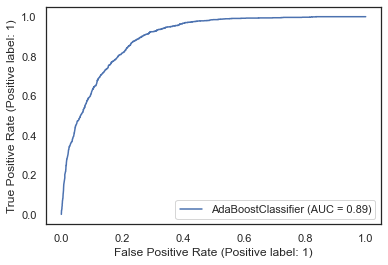



 Error of  GradientBoostingClassifier() :
Mean absolute error : 0.1459412780656304
Mean squared error : 0.1459412780656304
Root Mean Squared Error: 0.3820226145997517


 R2 Score : 0.08009269487310866
85.40587219343696




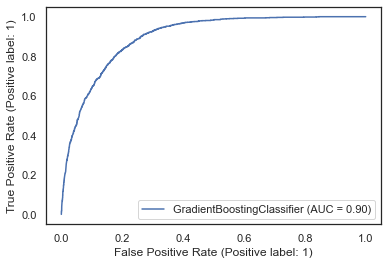



 Error of  RandomForestClassifier() :
Mean absolute error : 0.1766839378238342
Mean squared error : 0.1766839378238342
Root Mean Squared Error: 0.4203378853063737


 R2 Score : -0.1136865954376447
82.33160621761658




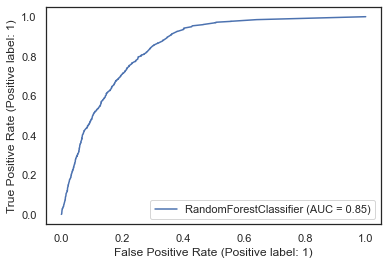



 Error of  KNeighborsClassifier() :
Mean absolute error : 0.17271157167530224
Mean squared error : 0.17271157167530224
Root Mean Squared Error: 0.4155858174616913


 R2 Score : -0.08864769837501929
82.72884283246978




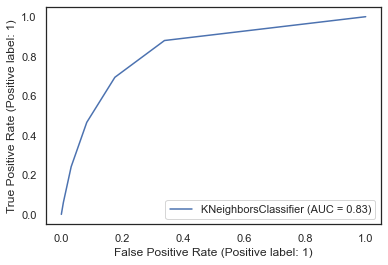



 Error of  SVC(random_state=42) :
Mean absolute error : 0.15751295336787566
Mean squared error : 0.15751295336787566
Root Mean Squared Error: 0.3968790160336972


 R2 Score : 0.007153299081982367
84.24870466321244




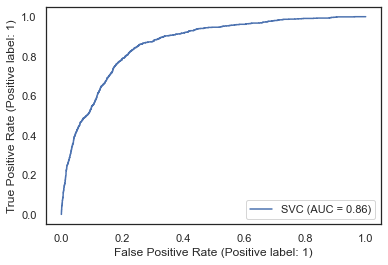



 Error of  DecisionTreeClassifier(random_state=42) :
Mean absolute error : 0.22556131260794474
Mean squared error : 0.22556131260794474
Root Mean Squared Error: 0.4749329559084574


 R2 Score : -0.4217738940777753
77.44386873920553




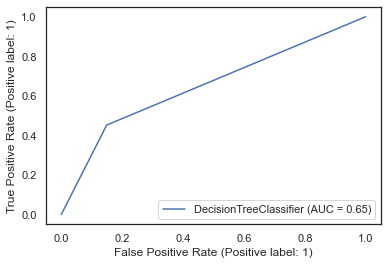

In [481]:
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
#Train the model using the training sets y_pred=clf.predict(X_test), prediction on test set
for clf in (rfc, et, bmc, abc,gbc,rft,knn,svc,dt):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('\n')                                        
    print(' Error of ', clf, ':' )
    print('Mean absolute error :', mean_absolute_error(y_test, y_pred))
    print('Mean squared error :', mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('\n')

    print(' R2 Score :',r2_score(y_test, y_pred))
    #print(r2_score(y_test,y_pred)*100) 
    print(accuracy_score(y_test, y_pred)*100)
    print('\n')
    display = RocCurveDisplay.from_estimator(clf,X_test,y_test)   
    plt.legend(prop={'size':11}, loc='lower right')
    plt.show()
    #print('=============================================================================================================='))

# Cross Validation for the Models

In [ ]:

ExtraTreesClassifier() 
BaggingClassifier() 
AdaBoostClassifier()
GradientBoostingClassifier()
RandomForestClassifier()
KNeighborsClassifier()
SVC(random_state=42)
DecisionTreeClassifier(random_state=42)

In [482]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, X_Scalar,y):
    rmse =(cross_val_score(model, X_Scalar,y, cv=6))
    return(rmse)



models = [RandomForestClassifier(),
         BaggingClassifier(),
         AdaBoostClassifier(),
         AdaBoostClassifier(),
         GradientBoostingClassifier(),
         KNeighborsClassifier(),
         SVC(random_state=42),
         DecisionTreeClassifier(random_state=42), 
         ]
          
          
names = [rfc, et, bmc, abc,gbc,rft,knn,svc,dt]
          
for model,name in zip(models,names):
          score = rmse_cv(model,X,y)
          print("{}  : {:.4f}, {:4f}".format(name,score.mean()*100,score.std()*100))

RandomForestClassifier()  : 81.3472, 0.543424
ExtraTreesClassifier()  : 80.3022, 0.691224
BaggingClassifier()  : 84.7366, 0.702898
AdaBoostClassifier()  : 84.7366, 0.702898
GradientBoostingClassifier()  : 84.9870, 0.659435
RandomForestClassifier()  : 81.3774, 0.553099
KNeighborsClassifier()  : 80.7297, 0.428158
SVC(random_state=42)  : 80.5915, 0.009655
DecisionTreeClassifier(random_state=42)  : 77.2927, 0.591474


# Hyper Parameter Tuning : GridSearchCV

In [491]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [ ]:
n_estimators = 500, max_samples = 0.5, max_features = 0.5

In [492]:
grid_search = GridSearchCV(RandomForestClassifier(),param_grid)
grid_search.fit(X_train, y_train)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]})

In [493]:
print(grid_search.best_estimator_)
print('Best score:', grid_search.best_score_) #grid.cv_scores_
print('Best params:', grid_search.best_params_)

RandomForestClassifier(max_depth=3, max_features=None, max_leaf_nodes=9,
                       n_estimators=150)
Best score: 0.8384571099597006
Best params: {'max_depth': 3, 'max_features': None, 'max_leaf_nodes': 9, 'n_estimators': 150}


In [494]:
y_pred_grid=grid_search.best_estimator_.predict(X_test) # With best parameter
y_pred_grid

array([0, 0, 0, ..., 1, 0, 0])

In [495]:
print('MSE:',mean_squared_error(y_pred_grid,y_test))
print('MAE:',mean_absolute_error(y_pred_grid,y_test))
print('Accuracy Score:',accuracy_score(y_pred_grid,y_test)*100)

MSE: 0.15682210708117444
MAE: 0.15682210708117444
Accuracy Score: 84.31778929188256


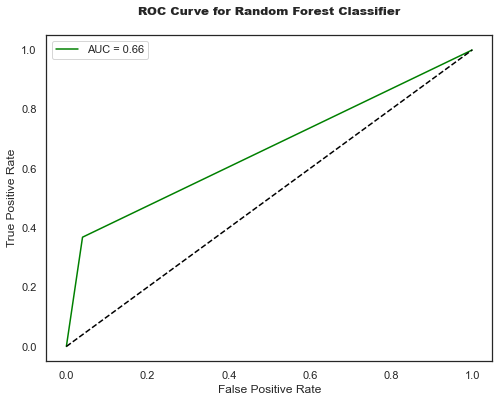

In [496]:
#ROC Curve and Area Under the Curve (AUC) for Decision Tree
y_pred_proba =grid_search.best_estimator_.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_grid)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_grid)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest Classifier",pad=20,fontweight="black")
plt.legend()
plt.show()

# Saving the best Model

In [497]:
joblib.dump(grid_search.best_estimator_,'Income Bracket Prediction Final Status.obj')

['Income Bracket Prediction Final Status.obj']

,Y Test,Pred
14876,1,0
23025,0,0
16431,0,0
10976,0,0
21829,0,0
...,...,...
9090,0,0
18982,0,1
17567,1,1
17117,0,0


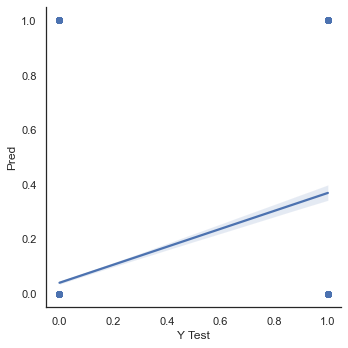

In [498]:
# Comparing the Actual price and predicted price
cmp_data = pd.DataFrame({'Y Test':y_test , 'Pred':y_pred_grid},columns=['Y Test','Pred'])
#cmp_data = pd.DataFrame({'Y Test':np.array(y_test) , 'Pred':np.array(y_pred_grid)},index= range(len(y_test)))
sns.lmplot(x='Y Test',y='Pred',data=cmp_data,palette='rainbow')
cmp_data